<a href="https://colab.research.google.com/github/geehaad/Custoizable-Neural-Network/blob/main/Streamlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential 
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

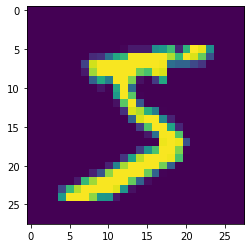

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [ ]:
def preprocess_image(images):
  images = images / 255
  return images
X_train = preprocess_image(X_train)
X_test = preprocess_image(X_test)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
model = Sequential()
model.add(InputLayer((28,28)))
model.add(Flatten())
model.add(Dense(32, 'relu'))
model.add(Dense(10))
model.add(Softmax())
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                330       
_________________________________________________________________
softmax_6 (Softmax)          (None, 10)                0         
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [ ]:
save_cp = ModelCheckpoint('model', save_best_only = True)
history_cp = tf.keras.callbacks.CSVLogger('history.csv', separator=',')
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, callbacks=[save_cp, history_cp])

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3616 - accuracy: 0.9002 - val_loss: 0.2248 - val_accuracy: 0.9341
INFO:tensorflow:Assets written to: model/assets
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2028 - accuracy: 0.9427 - val_loss: 0.1690 - val_accuracy: 0.9502
INFO:tensorflow:Assets written to: model/assets
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1632 - accuracy: 0.9533 - val_loss: 0.1509 - val_accuracy: 0.9554
INFO:tensorflow:Assets written to: model/assets
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1421 - accuracy: 0.9601 - val_loss: 0.1503 - val_accuracy: 0.9559
INFO:tensorflow:Assets written to: model/assets
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1296 - accuracy: 0.9632 - val_loss: 0.1338 - val_accuracy: 0.9637
INFO:tensorflow:Assets written to: model/assets


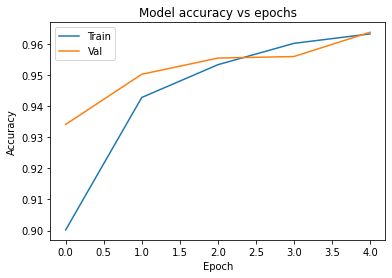

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt

history = pd.read_csv('history.csv')
fig = plt.figure()
plt.plot(history['epoch'], history['accuracy'])
plt.plot(history['epoch'], history['val_accuracy'])
plt.title('Model accuracy vs epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()